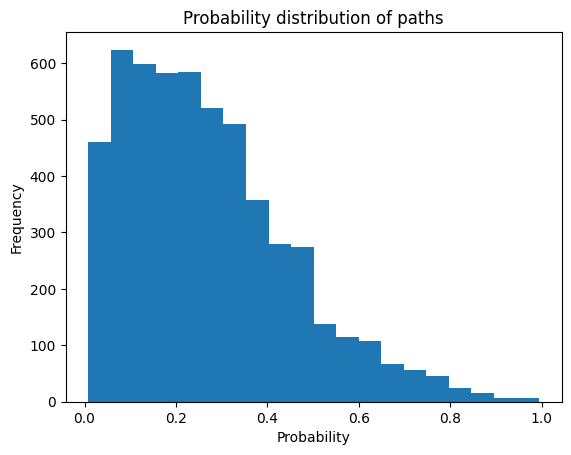

In [3]:
# plot probability distribution of paths
import matplotlib.pyplot as plt
import numpy as np

# load paths from paths_5356_processed.txt
paths = []
with open('paths_5356_processed.txt', 'r') as f:
    for line in f:
        path_data = eval(line)
        paths.append(path_data)

# get probabilities
probs = [p[-1]['probability'] for p in paths]

# plot histogram
plt.hist(probs, bins=20)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Probability distribution of paths')
plt.show()

In [4]:
# sort paths by probability
paths = sorted(paths, key=lambda x: x[-1]['probability'], reverse=True)
print(paths[:10])

# select paths with average probability > 0.5
#selected_paths = [p for p in paths if sum(r['p'] for r in p[1]['relation_probabilities']) / 4 > 0.24]
#print(len(selected_paths))

[[{'eid_0': 'dc35fa387cace8c13ef38dc6b3b22f123daefe9e', 'probability': 1.0, 'words': 'i have no choice'}, {'rid_1': '47484df6eb20341bac02fcdd67db6e021e4224f0', 'relation_type': 'Synchronous', 'relation_probabilities': [{'rid': '2bdc24ef7af2b9fec219cd7e1047a9406ff29289', 'p': 0.00042733520886008335, 'tail_ev': {'tid': 'bb3d28aa029e666dfc6c1f18216bd65eef3a5b71', 'words': 'she call you'}}, {'rid': '2926fca8ef5ab3df3dcb130a54e1f0eed9a70b88', 'p': 0.0005697802784801111, 'tail_ev': {'tid': 'c893d0af6010af55f83cf57eed64981786d4dc59', 'words': 'she admit she crime'}}, {'rid': '7dbd586e3c68bd706837f57e28191dc5b89792c0', 'p': 0.0005697802784801111, 'tail_ev': {'tid': 'ce0afbd5dafe84858664a11d4ec9d4192115929d', 'words': 'adt call'}}, {'rid': '47484df6eb20341bac02fcdd67db6e021e4224f0', 'p': 0.9941241408781738, 'tail_ev': {'tid': '5877ac2dfa9d3e9db0dfe4a8d873415809c7101d', 'words': 'i be a robot with will'}}]}, {'eid_1': '5877ac2dfa9d3e9db0dfe4a8d873415809c7101d', 'probability': 0.9941241408781738,

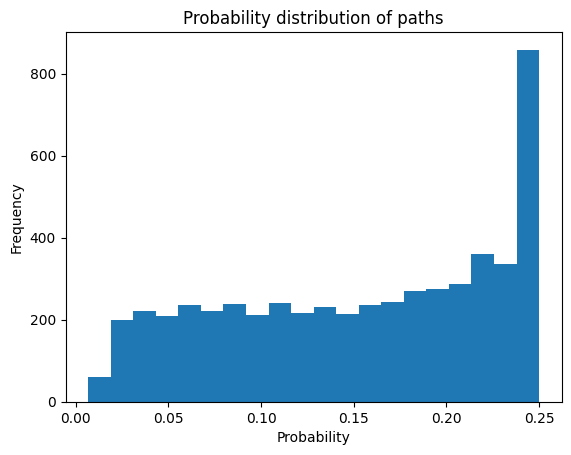

In [5]:
# plot probability distribution of paths
probs = [sum(r['p'] for r in p[1]['relation_probabilities']) / 4 for p in paths]
plt.hist(probs, bins=20)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Probability distribution of paths')
plt.show()


In [6]:
'''
Path structure design:
[
    {
        'eid_0': '1befa42c351790c13767c966a64a2fa85d204b63',    # start eventuality
        'probability': 1.0
        'words': '[words]'
    }, 
    {
        'rid_1': '3eaf95ae8c03f05c268a771fc377f590d1c38981',    # correct relation
        'relation_type': 'Succession',
        'relation_probabilities': [     # all options with probabilities
            {
                'rid': '32c8436ecec21aca9b648c6186c850e92b54c7b1',
                'tail_ev': {'tid': "[tid]", 'words': '[words]'}'
                'p': 0.1141304347826087
            }, 
            {
                'rid': 'f292829d74ab0e28f000f8cc1fd1f0b4d20d294b',
                'tail_ev': {'tid': "[tid]", 'words': '[words]'},
                'p': 0.16304347826086957
            },
            {
                'rid': '477985b5222fcee43644c7df0a5bcdc9d599fa92',
                'tail_ev': {'tid': "[tid]", 'words': '[words]'},
                'p': 0.19021739130434784
            }, 
            {
                'rid': '3eaf95ae8c03f05c268a771fc377f590d1c38981',
                'tail_ev': {'tid': "[tid]", 'words': '[words]'},
                'p': 0.19021739130434784
            }
        ]
    }, 
    {
        'eid_1': '37afca50be109185bb894c306b02c258810eda19',     # correct eventuality
        'probability': 0.19021739130434784,
        'words': '[words]'
    }
]
'''

'\nPath structure:\n[\n    {\n        \'eid_0\': \'1befa42c351790c13767c966a64a2fa85d204b63\',    # start eventuality\n        \'probability\': 1.0\n        \'words\': \'[words]\'\n    }, \n    {\n        \'rid_1\': \'3eaf95ae8c03f05c268a771fc377f590d1c38981\',    # correct relation\n        \'relation_type\': \'Succession\',\n        \'relation_probabilities\': [     # all options with probabilities\n            {\n                \'rid\': \'32c8436ecec21aca9b648c6186c850e92b54c7b1\',\n                \'tid\': {\'tid\': "[tid]", \'words\': \'[words]\'}\'\n                \'p\': 0.1141304347826087\n            }, \n            {\n                \'rid\': \'f292829d74ab0e28f000f8cc1fd1f0b4d20d294b\',\n                \'tid\': {\'tid\': "[tid]", \'words\': \'[words]\'},\n                \'p\': 0.16304347826086957\n            },\n            {\n                \'rid\': \'477985b5222fcee43644c7df0a5bcdc9d599fa92\',\n                \'tid\': {\'tid\': "[tid]", \'words\': \'[words]\'},\n   

In [7]:
final_structure = {
    'qid': '',
    'ctx': '',
    'relation': '',
    'choices': [
        '', '', '', ''
    ],
    'answer': ''
    }

In [9]:
# put paths into final structure
import random
import base64
import hashlib

final_paths = []
for path in paths:
    final_path = final_structure.copy()
    ids = path[0]['eid_0'] + path[1]['rid_1'] + path[2]['eid_1']
    final_path['qid'] = hashlib.md5(ids.encode()).hexdigest() # generate unique qid 
    final_path['ctx'] = path[0]['words']
    final_path['relation'] = path[1]['relation_type']
    choices = [r for r in path[1]['relation_probabilities']]
    random.shuffle(choices) # random.shuffle() is inplace and returns None
    # get id of correct choice
    for i, choice in enumerate(choices):
        if choice['rid'] == path[1]['rid_1']:
            correct_choice = i + 1 # 1-based index
            break
    final_path['choices'] = [c['tail_ev']['words'] for c in choices]
    # set answer to index of correct choice
    final_path['answer'] = correct_choice
    final_paths.append(final_path)

# save final paths as json
import json
with open('final_paths_5356.json', 'w') as f:
    json.dump(final_paths, f, indent=4)

    

In [ ]:

# select paths with probability > 0.5
selected_paths = [p for p in paths if p[-1]['probability'] > 0.5]
print(len(selected_paths))

In [27]:
# put selected paths into final structure
import random
import base64
import hashlib

final_paths = []
for path in selected_paths:
    final_path = final_structure.copy()
    ids = path[0]['eid_0'] + path[1]['rid_1'] + path[2]['eid_1']
    final_path['qid'] = hashlib.md5(ids.encode()).hexdigest() # generate unique qid 
    final_path['ctx'] = path[0]['words']
    final_path['relation'] = path[1]['relation_type']
    choices = [r['tail_ev']['words'] for r in path[1]['relation_probabilities']]
    random.shuffle(choices) # random.shuffle() is inplace and returns None
    final_path['choices'] = choices
    # find correct answer
    for i, choice in enumerate(choices):
        if choice == path[2]['words']:
            final_path['answer'] = i + 1 # 1-based index
            break
    final_paths.append(final_path)

# save final paths as json
import json
with open('final_paths.json', 'w') as f:
    json.dump(final_paths, f, indent=4)